#CNN

**Convolutional Neural Network** (CNN or ConvNet) is a type of Artificial Neural Networks applied to **analyze visual imagery**.

研究表示：图像处理(image processing)能显著提高CNN的分类准确率

##Digital Image Processing

什么是图像处理？

**Digital image processing** (DIP) is the method to manipulate a digital image to either **enhance the quality or extract relevant information**.

什么是digital image?

A digital image is a **two-dimensional grid of intensity values**, represented by $I(x,y)$, where x and y are coordinates, and the value of $I$ at coordinates $(x,y)$ is called **intensity**.

**Pixels:** Short for Picture Element. A pixel is a single point (dot) in an image.

**Dimensions:** Specified by the width and height of the image.
1. Image width is the number of columns in the image.
2. Image height is the number of rows in the image.

A specific pixel is specified by its coordinates $(x,y)$ where $x$ is increasing from left to right, and $y$ is increasing from top to bottom.The origin $(0,0)$ is in the top-left corner.

例子：
\begin{matrix}
&(0, 0)  &(1, 0) &...  &(width-1,0) \\
&(0, 1)  &(1, 1) &...  &(width-1,1) \\
&...     &...    &...  &... \\
&(0, height - 1)  &(1, height - 1) &...  &(width-1,height - 1)
\end{matrix}

**Grayscale Images:**
Grayscale is a range of gray shades from black to white.

**Range:** 0 ~ 255 (0 for black, 127 for gray, and 255 for white)

在数据处理时，我们经常使用Grayscale，因为Grayscale的数据量小，处理起来比较方便快捷。

**Color image:**
Color images have **intensity** from the darkest and lightest of 3 different colors, Red, Green, and Blue **(RGB)**.

例子：

| Color | RGB value |
|:----- | :-----    |
|Black  | RGB = (0, 0, 0)|
|White  | RGB = (255, 255, 255)|
|Red    | RGB = (255, 0, 0)|
|Green  | RGB = (0, 255, 0)|
|Blue   | RGB = (0, 0, 255)|
|Yellow | RGB = (255, 255, 0)|


In [ ]:
# Access images in Google drive

# Import drive from google.colab package
from google.colab import drive
# Import os and sys modules
import os, sys

# Mount Google Drive
drive.mount('/content/drive')
# Assume a folder "images" has been created, go to the folder "images"
os.chdir('/content/drive/My Drive/images')
# Add the path for interpreter to search
sys.path.append('/content/drive/My Drive/images')

In [ ]:
# Read Images in Colab

# import library:
import matplotlib.image as mpimg

# 使用imread()来读取这个image
# 格式：
# mpimg.imread(fname, format=none)
# fname: 读取文档或者照片的名字
# format: 读取文档或者的格式，如果不提供format, python会self-deduct,
#         如果self-deduct失败，会默认尝试使用png格式打开
# return type: numpy.array
# array.shape:
#     (M, N) for Grayscale image
#     (M, N, 3) for RGB image
#     (M, N, 4) for RGBA images: red, green, blue, alpha, 这里alpha指示了每一个像素的透明度
# PNG images are returned as float_32 arrays (0-1). (usually)
# All other formats are returned as int_8 arrays (usually), with a bit depth determined by the file’s contents.

In [ ]:
# show image in Colab
import matplotlab.pyplot as plt

# 使用imshow()来展示这个图像：
# 格式：
# plt.imshow(X, cmap, vmin, vmax)

# Parameters:
# X: The image data.
#    The first two dimensions (M,N) define the rows and columns of the image.

# cmap: str (e.g., ’gray’) or Colormap. The Colormap instance or registered colormap name used to map
#       scalar data to colors. This parameter is ignored for RGB(A) data.

# vmin, vmax:
#     By default, imshow scales elements of the numpy array so that the smallest element becomes 0,
#     the largest becomes 1, and intermediate values are mapped to the interval [0,1] by a linear
#     function.
#     Optionally, imshow can be called with arguments, vmin and vmax. In such case all elements of the
#     array smaller or equal to vmin are mapped to 0, all elements greater or equal to vmax are sent to
#     1, and the elements between vmin and vmax are mapped in a linear fashion into the interval [0,1].

# Returns AxesImage
# AxesImage is an image attached to an Axes.


In [ ]:
# save image:

# 使用imsave()
# 格式：
# plt.imsave(fname, arr)
# Parameters:
# fname: 存储的位置/文档名字
# arr: image array（图片本身）

#OpenCV

##Image Processing using OpenCV

**OpenCV (Open Source Computer Vision Library)**: is an open source computer vision and machine learning software library.

##Convert Color Images to Grayscale
如何将一个图片变成黑白图片？

Ony way to convert color images to grayscale is to apply the following **formula**:
\begin{align}
  V = 0.299 \times R + 0.587 \times G + 0.114 \times B
\end{align}
如何在OpenCV上实现？



In [ ]:
# convert color image to grayscale
import cv2

# 使用：cvtColor()
# 格式：
# cv2.cvtColor(image, code)
# image: Image to be processed in n-dimensional array
# code: Conversion code for colorspace. For converting RGB to grayscale, we use cv2.COLOR_RGB2GRAY

##Image Affine Transformation
 An affine transformation is any **transformation** that **preserves collinearity, parallelism as well as the ratio of distances between the points**

 Affine transformation不会保证角度和距离不变

 旋转，放缩，平移都属于affine transformation

In general, the affine transformation can be expressed in the form of a **linear transformation followed by a vector addition** as follows:
$$\left(\begin{matrix} x_1 \\ y_1 \end{matrix}\right)
= \left(\begin{matrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{matrix}\right)
\left(\begin{matrix} x_0 \\ y_0 \end{matrix}\right) +
\left(\begin{matrix} b_0 \\ b_1 \end{matrix}\right)$$

So:
$$\left(\begin{matrix} x_1 \\ y_1 \end{matrix}\right) =
\left(\begin{matrix} a_{00} & a_{01} &b_0\\ a_{10} & a_{11} &b_1 \end{matrix}\right) \left(\begin{matrix} x_0 \\ y_0 \\ 1 \end{matrix}\right)$$

这里，我们将矩阵$M = \left(\begin{matrix} a_{00} & a_{01} &b_0 \\ a_{10} & a_{11} &b_1 \end{matrix}\right)$称为：**transformation matrix.**


## Image Translation
Translation is simply the shifting of object location.

**Transformation Matrix**:
$$M = \left(\begin{matrix} 1 & 0 &b_0 \\ 0 & 1 &b_1 \end{matrix}\right)$$

##Image Reflection
Image reflection的本质是：
1. 将图片沿x/y-axis filp
2. 将filp后的图像再平移下来

**Transformation Matrix**

respect to x-axis:
$$M = \left(\begin{matrix} 1 & 0 &0 \\ 0 & -1 &rows - 1 \end{matrix}\right)$$

respect to y-axis:
$$M = \left(\begin{matrix} -1 & 0 &cols - 1 \\ 0 & 1 & 0 \end{matrix}\right)$$

##Image Rotation
Image rotation：绕点$(x_0, y_0)$旋转$\theta$度

**Formula:**
\begin{align}
x_{1} &= (x−x_0)cosθ + (y − y_0)sinθ + x_0 \\
y_{1} &= −(x−x_0)sinθ + (y − y_0)cosθ + y_0
\end{align}

**Transformation Matrix**:
$$\left(\begin{matrix} x_1 \\ y_1 \end{matrix} \right) =
\left(\begin{matrix} cos\theta &sin\theta &-x_0cos\theta - y_0sin\theta +x_0 \\ -sin\theta &cos\theta &x_0sin\theta - y_0cos\theta +y_0 \end{matrix} \right)
\left(\begin{matrix} x \\ y \\ 1 \end{matrix} \right)$$

In [ ]:
import cv2
# Image Translation:
# 使用 cv2.warpAffine
# 格式：cv2.warpAffine(src, M, dsize, flags, borderMode, borderValue)

# Input Parameter:
# src: input image
# M: 2×3 transformation matrix
# dsize: size of the output image
# flags: combination of interpolation methods
# borderMode: ...
# borderValue: ...

# Return Type:
# 同src一样的data type

##Image Resize
适用于对图片进行拉伸或缩放

In [ ]:
import cv2
# 使用：cv2.resize
# 格式：cv2.resize(src, dsize, dst, fx = 0, fy = 0, interpolation = INTER_LINEAR)

# Input Parameter:
# src: Input image
# dsize: The size for the output image
# dst (optional): The output image with size dsize
# fx (optional): The scale factor along the horizontal axis
# fy (optional): The scale factor along the vertical axis
# interpolation: ...

# Return Type:
# 同src

##Characteristics of Image Operations
1. **Point**: The output value at a specific coordinate is dependent **only on the input value at the same coordinate**.
2. **Local**: The output value at a specific coordinate is dependent on the input values in the **neighborhood of that same coordinate**.
3. **Global**: The output value at a specific coordinate is dependent on **all the values in the input image**.

##Contrast Streching
**Contrast stretching** is an image enhancement method which attempts to improve an image by **stretching the range of intensity values**.

要点：增加图片的对比度

**Formula:**
\begin{align}
I_{new} = \frac{I−I_{min}}{I_{max} −I_{min}}×255
\end{align}

You can consider it as a kind of **'re-normalization'**, sending minimum intensity to 0, and miximum intensity to 255.

##Gary thershold: Otsu’s method

It is a way to create a binary image from a grayscale to or full-color image

$$I_{new} = \left\{\begin{aligned} 0, &I < T \\
255, &otherwise \end{aligned}\right.$$

We need a way to automatically determine the threshold value $T$ so that the result of thresholding is reproductible.
1. Select an initial estimate of the threshold $T$. A good initial value is the average intensity of the image.
2. **Partition the image into two groups**, $R_1$, $R_2$, using the threshold $T$.
3. Calculate the mean gray values $\mu_1$ and $\mu_2$ of the partitions, $R_1$, $R_2$.
4. Compute a new threshold
 $$T = \frac{1}{2} (\mu_1 + \mu_2)$$
5. Repeat steps 2-4 until the mean values $\mu_1$ and $\mu_2$ in successive iterations do not change.

**Remark**:
the initial value would **not effect the final result**, just would effect the echo we need for train.

In [ ]:
# Ostu's Method
import cv2
# 使用：cv2.threshold()
# 格式：cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

# Input Parameter
# source: input image array (must be grayscale)
# thresholdValue: value of threshold below and above which pixel values will change accordingly
# maxVal: Maximum value that can be assigned to a pixel
# thresholdingTechnique: The type of thresholding to be applied
# (For Otsu’s, we put cv2.THRESH BINARY + cv2.THRESH OTSU)

# Return Type:
# 有两个返回值：
# 第一个是：使用的thresholding Technique
# 第二个是：处理完的图像

#Convolution
A convolution is an **integral that expresses the amount of overlap** of one function $g$ as it is shifted over another function $f$. It therefore “blends” one function with another.

计算方式：

Image convolution is defined as
\begin{align}
 O(x,y) =\sum_{m=−∞}^{∞}\sum_{n=−∞}^{∞}K(m,n)I(x−m,y −n)
\end{align}
 where I is the input image, K is the image kernel.

Assume the origin (i.e., $(0,0)$) of I is top-left corner, while
the origin (i.e., $(0,0)$) of $K$ is the center of the kernel.
If the image kernel is $3×3$, then
\begin{align}
 O(x,y) =\sum_{m=−1}^{1}\sum_{n=−1}^{1}K(m,n)I(x−m,y −n)
\end{align}

例子：

Input Image
$$I = \left(
\begin{matrix}
10 &1 &3 &2 &6 \\
4 &3 &5 &8 &0  \\
8 &7 &9 &6 &5
\end{matrix}\right)$$

Image Kernel:
$$K = \left(\begin{matrix}
-1 &0 &1 \\
-1 &0 &1 \\
-1 &0 &1 \end{matrix}\right)$$
\begin{align}
O(1,1)
 =&K(−1,−1)I(2,2) +K(−1,0)I(2,1) + K(−1,1)I(2,0)+ \\
 &K(0,−1)I(1,2) + K(0,0)I(1,1) + K(0,1)I(1,0)+     \\
 &K(1,−1)I(0,2) + K(1,0)I(0,1) + K(1,1)I(0,0) \\
 &=(−1)(9) + (−1)(5) + (−1)(3) +(0)(7) + (0)(3)
 + (0)(1) + (1)(8) + (1)(4) + (1)(10) \\
 &=−9−5−3+8+4+10=5
\end{align}

取巧的计算方法：
1. 将kernel左右翻转后再上下翻转
2. 将翻转完成后的inverse kernel与原图像进行memberwise的乘法

##Problem: boundary pixel
##Method 1: Zero Padding
我们可以再原图像的边缘镶上一圈0，这样boundary pixel就可以被处理了

例：
$$I_{new} = \left(
\begin{matrix}
0 &0 &0 &0 &0 &0 &0 \\
0 &10 &1 &3 &2 &6 &0 \\
0 &4 &3 &5 &8 &0 &0  \\
0 &8 &7 &9 &6 &5 &0 \\
0 &0 &0 &0 &0 &0 &0
\end{matrix}\right)$$

##Method 2: Mirror Padding
我们可以将原图像pixel沿边缘做一个镜像对称，这样就得到了mirror padding.
例：
$$I_{new} = \left(
\begin{matrix}
3 &4 &3 &5 &8 &0 &8 \\
1 &10 &1 &3 &2 &6 &2 \\
3 &4 &3 &5 &8 &0 &8  \\
7 &8 &7 &9 &6 &5 &6 \\
3 &4 &3 &5 &8 &0 &8
\end{matrix}\right)$$

##Method 3: Reflection Padding
和Mirror Padding类似，但是对称轴不同。

**注：在padding = 1的情况下，它和Replication padding会产生一样的结果。但是当padding > 1时， 二者的结果不同。**

例：padding = 2
$$I_{new} = \left(
\begin{matrix}
3 &4  &4  &3 &5 &8 &0 &0 &8 \\
1 &10 &10 &1 &3 &2 &6 &6 &2 \\
1 &10 &10 &1 &3 &2 &6 &6 &2 \\
3 &4  &4  &3 &5 &8 &0 &0 &8 \\
7 &8  &8  &7 &9 &6 &5 &5 &6 \\
7 &8  &8  &7 &9 &6 &5 &5 &6 \\
3 &4  &4  &3 &5 &8 &0 &0 &8
\end{matrix}\right)$$

##Method 4: Replication Padding
复制boundary pixel

例：padding = 2

$$I_{new} = \left(
\begin{matrix}
10 &10 &10 &1 &3 &2 &6 &6 &6 \\
10 &10 &10 &1 &3 &2 &6 &6 &6 \\
10 &10 &10 &1 &3 &2 &6 &6 &6 \\
4 &4  &4  &3 &5 &8 &0 &0 &0 \\
8 &8  &8  &7 &9 &6 &5 &5 &5 \\
8 &8  &8  &7 &9 &6 &5 &5 &5 \\
8 &8  &8  &7 &9 &6 &5 &5 &5
\end{matrix}\right)$$

In [ ]:
# Implementation in OpenCV
import cv2
# using filter2D():
# 格式：
# cv2.filter2D(src, ddepth, kernel, dst, anchor, delta, borderType=cv2.BORDER_DEFAULT)
# parameters:
# src: 原图像
# ddepth: 想要的图片深度
# kernel: convolution kernel
# dst:
# anchor:

##Smoothing Kernel
$$I = \left(
  \begin{matrix}
  \frac{1}{9} &\frac{1}{9} &\frac{1}{9} \\
  \frac{1}{9} &\frac{1}{9} &\frac{1}{9} \\
  \frac{1}{9} &\frac{1}{9} &\frac{1}{9} \end{matrix}\right) $$
显然，这个Kernel会将Intensity变为它周围pixel Intensity的平均值，
因而图片变得smooth了
##Sharping Kernel
$$I = \left(
  \begin{matrix}
  -1 &-1 &-1 \\
  -1 &9 &-1 \\
  -1 &-1 &-1 \end{matrix}\right) $$
为什么它能使图片对比度增强？
1. 当core和周围的Intensity相近时，sum会趋近于1，代表没有变化
2. 当core和周围的Intensity相差很多时，sum会大于原来的Intensity，

所以原来对比小的地方没有变化，而原来对比度大的地方对比被进一步放大了
##Edge Kernel

**Vertical Edge Kernel**:
$$I = \left(
  \begin{matrix}
  -1 &0 &1 \\
  -1 &0 &1 \\
  -1 &0 &1 \end{matrix}\right) $$
为什么它能够探测vertical line?
1. 当左右两侧的Intensity相近时，sum会趋近于0
2. 当左右两侧的Intensity相差很远时，sum不为0，故"提取"出来了vertical edge.

**Horizontal Edge Kernel**:
$$I = \left(
  \begin{matrix}
  -1 &-1 &-1 \\
  0 &0 &0 \\
  1 &1 &1 \end{matrix}\right) $$
为什么它能够探测horizontal line?
1. 当上下两侧的Intensity相近时，sum会趋近于0
2. 当上下两侧的Intensity相差很远时，sum不为0，故"提取"出来了horizontal edge.

#Image Convolutions
Clearly, image convolution is powerful in **finding the features of an image** if we already know the right kernel to use.

Kernel design is an art and has been refined over the last few decades to do some pretty amazing things with images. But the important question is, what if **we don’t know the features we are looking for**? Or what if we do know, but **we don’t know what kernel should look like**?

Convolutional neural networks were developed in the late 1980s and then forgotten about **due to the lack of processing power**.
With the powerful Graphical Processing Units (GPUs), the research on CNNs and deep learning was given new life.

##什么是CNN?

A convolutional neural network is a **neural network with a convolution operation** in at least one of the layers.

它是如何运作的？
1. 每一个**像素点都是一个feature**，他们就像是ANN里的input node一样
2. **kernel就是ANN中的weights**，它们就是在CNN中我们要learn的training parameter
3. **result from each convolution就是下一个hidden layer的input**. Each feature or pixel of the convolved image is a node in the hidden layer.

在CNN中有3中不同的layer：
1. Pooling layer
2. Input layer
3. Convolutional layer


##Convulotional Layer
**How to calculate output shape and number of paramter?**

公式：

$\text{input shape} = (h_1, w_1, c_1)$, $\text{kernel shape} = (h_2, w_2, c_1)$

\begin{align}
\text{#output shape} &= \text{output height} \times \text{output width} \times \text{number of channel} \\
&= \frac{h_1 - h_2 + 2 \times \text{padding}}{\text{stride}} \times \frac{w_1 - w_2 + 2 \times \text{padding}}{\text{stride}} \times \text{number of node in this layer}
\\ \\
\text{#param} &= (h_2 \times w_2 \times c_1 + 1)\times \text{number of nodes in this layer}
\end{align}

**Note that: in the formula that calculate number of parameters, "$+1$" is for bias in each node.** And $(h_2 \times w_2 \times c_1 + 1)$ represents number of parameters inside each kernel.

注意：当除完stride发现不是整数时，选择向下取整(floor)

##Stride
Stride is the amount of movement between applications of the kernel to the input image.

**定义：**

你在进行Convulotion时，可以跳掉一些pixel，这称作stride.

为什么我们需要stride?
1. 这样可以缩减output volume
2. **Lesser memory** needed for output.
3. It **avoids overfitting** especially in case of image
   processing having a large number of attributes.

**Useful Formula for Determining the Size of Output Image**
$$\text{output size} = \frac{\text{size of image deminsion} - \text{size of kernel deminsion} + 2 * \text{padding}}{\text{stride}} + 1 $$

例子：

image: 7 × 7, kernel: 3 × 3
Output size:
1. Stride 1 ⇒ Output size = (7- 3)/1 + 1 = 5
2. Stride 2 ⇒ Output size = (7- 3)/2 + 1 = 3
3. Stride 3 ⇒ Output size = (7- 3)/3 + 1 = 2.33 **(Does not fit!)**




##Non-linearity in CNN
Convolution is a **linear operation**. We **need non-linearity**; otherwise, 2 convolution layers would be no more powerful than 1.

**Remark:**

**Why Convolution is linear operation?**

1. Consider a single pixel, in layer 1, it is **a linear
   combination of itself and nearby pixel**. So, it is linear operayion.
2. Consider layers, each layer is 'linear'. If there is no    non-linear activation function, the whole CNN network is just as a huge linear combination. (i.e. same as 1 layer CNN)

In a neural network, we use different activation functions, typically using sigmoid. But rectified linear unit **(ReLU) is more popular for CNN** as it does **not require any expensive computation**. It has been shown to **speed up the convergence of stochastic gradient descent algorithms**.

#Pooling layer
The **pooling layer is key to** ensuring that the subsequent layers of the CNN can **pick up larger-scale detail than just edges and curves**.
##Method 1: Max Pooling
Done by applying a **max filter** to non-overlapping subregions of
the initial representation.

例子：
$$I = \left(\begin{matrix}
12 &20 &30 &0 \\
8 &12 &2 &0  \\
34 &70 &37 &4 \\
112 &100 &25 &12 \end{matrix}\right)$$

After Pooling:
$$I = \left(\begin{matrix}
20 &30 \\
112 &37
\end{matrix}\right)$$

##Method 2: Average Pooling
Done by applying a average filter to non-overlapping subregions of the initial representation.

例子：
$$I = \left(\begin{matrix}
12 &20 &30 &0 \\
8 &12 &2 &0  \\
34 &70 &37 &4 \\
112 &100 &25 &12 \end{matrix}\right)$$

After Pooling:
$$I = \left(\begin{matrix}
13 &16 \\
79 &19.5
\end{matrix}\right)$$

#Common Problems
##Underfitting
Underfitting typically refers to a model that **has not been trained sufficiently**. This could be due to insufficient training time or a model that was simply not trained properly. A model that is under fitted will perform poorly on the training data and new, unseen data alike.

##Overfitting
Overfitting refers to a model that was **trained too much on the particulars of the training data** (when the model learns the noise in the dataset). A model that is overfitted will not perform well on new, unseen data.

##Dropout layer:
**Dropout is a simple way to prevent neural networks from overfitting.**

Dropout is a regularization method. During training, **some number of layer outputs are randomly ignored** or “dropped out”.

注意：

我们一般不会dropout input和output，一般只在Dense layer之间加入Dropout layer.

A **common value is a probability of 0.5** for retraining the output of each node in a hidden layer.

##Procedures
 1. Import required libraries and define global variables
 2. Load and prepare the data
 3. Build the model
 4. Compile the model
 5. Train the model
 6. Evaluate the model accuracy
 7. Save the model
 8. Use the model

##One-Hot Encoding
to categorical() **converts class vector (integers from 0 to number of classes) to binary class matrix**, for use of categorical crossentropy.

In [ ]:
import numpy as np
from keras.utils import to_categorical

y_train = [1, 0, 3, 4, 5, 0, 2, 1]
y_one_hot = to_categorical(y_train, num_classes=6)
print(y_one_hot)
# Output:

[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


为什么要使用One-Hot Encoding?

这样可以让我们的training data不受index大小的ranking影响，比如说我们有data: [1, 2, 3], 它们只是分为了三个categories，但是它们的大小可能会影响我们的结果，所以我们把它变成One-Hot matrix，这样每个categories都是一样的：[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

Benefits:

 Training data is more usable and expressive as a result of one-hot encoding, and it can be re-scaled easily.

##Number of Parameters


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten # Import Dense, Dropout, Flatten class
from keras.utils import to_categorical

# Import numpy-related utilities
from keras.callbacks import TensorBoard
from keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.math import confusion_matrix
from tensorflow.keras.metrics import categorical_crossentropy

batch_size = 128
num_classes = 10
epochs = 5
img_rows, img_cols = 28, 28 # Image dimensions

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)  # Reshape the data to 4-dimension
x_test = x_test.reshape(10000,28,28,1)    # Reshape the data to 4-dimension

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 # Add a dropout layer to prevent a model from overfitting
model.add(Dropout(0.25))

 # Add a flatten layer to convert the pooled data to a single column
 # that is passed to the fully-connected layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', # Default learning rate is 0.001
              loss=categorical_crossentropy,
              metrics=['accuracy']
              )


In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 validation_data=(x_test, y_test),
 callbacks=[tensorboard_callback]
 )

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.2277 - loss: 6.7428 - val_accuracy: 0.9014 - val_loss: 0.4482
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.7190 - loss: 0.8579 - val_accuracy: 0.9600 - val_loss: 0.1456
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8671 - loss: 0.4239 - val_accuracy: 0.9729 - val_loss: 0.0983
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9080 - loss: 0.3024 - val_accuracy: 0.9758 - val_loss: 0.0870
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9250 - loss: 0.2490 - val_accuracy: 0.9791 - val_loss: 0.0709


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,144 (664.63 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,430 (443.09 KB)

In [ ]:
validation_loss, validation_accuracy = model.evaluate(x_test, y_test, verbose=0)
# Print loss and accuracy
print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)

##Typical CNN Architecture
1. few convolutional layers (usually with ReLU activation)
2. a pooling layer
3. a few convolutional layers (usually with ReLU activation) and a pooling layer, and so on
4. Then, one or more fully connected layers (usually with ReLU activation)
5. Then, a final fully connected softmax layer

Generally, the **convolutional and pooling layers are for feature learning**, and the **fully-connected layers are for classification**.

Instead of using a convolutional layer with a large kernel size (e.g. 9×9 with 81 parameters), it is better to **stack two convolutional layers with smaller kernels** (e.g. 3×3) with 18 parameters for the two layers together.

In [1]:
# implement Convolution from Scratch
import numpy as np
def convolve(image, kernel):
  img_h, img_w = image.shape
  ker_h, ker_w = kernel.shape
  # flip the kernel
  kernel = kernel[::-1, ::-1]
  new_h = img_h - ker_h + 1
  new_w = img_w - ker_w + 1
  new_img = np.zeros((new_h, new_w))
  for i in range(0, new_h):
    for j in range(0, new_w):
      new_img[i, j] = np.sum(image[i : i + ker_h, j : j + ker_w] * kernel)

  return new_img

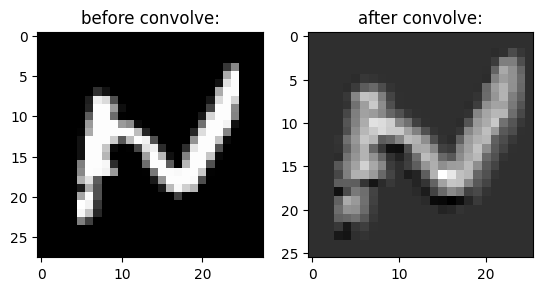

In [11]:
import numpy as np
import matplotlib.pyplot as plt
if __name__ == '__main__':
  kernel = np.array([[-1, 3, 1],
                     [7, 2, 2],
                     [-3, -2, 1]])
  text ="0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 55 136 0 0 0 0 0 0 0 0 0 \
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 172 253 0 0 0 0 0 0 0 0 0 0 \
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 18 226 253 0 0 0 0 0 0 0 0 0 0 \
   49 18 0 0 0 0 0 0 0 0 0 0 0 0 0 171 253 253 0 0 0 0 0 0 0 0 0 \
   30 238 219 80 0 0 0 0 0 0 0 0 0 0 0 23 219 253 212 0 0 0 0 0 0 \
   0 0 0 36 253 253 156 14 0 0 0 0 0 0 0 0 0 0 66 253 253 135 0 0 \
   0 0 0 0 0 0 0 94 253 253 107 1 0 0 0 0 0 0 0 0 0 24 213 253 253 \
   132 0 0 0 0 0 0 0 0 0 154 253 253 253 154 139 11 0 0 0 0 0 0 0 \
   114 253 253 244 16 0 0 0 0 0 0 0 0 3 170 253 253 253 253 253 190 \
   35 0 0 0 0 0 39 221 253 253 133 0 0 0 0 0 0 0 0 0 18 253 253 253 \
   205 90 190 253 241 81 0 0 0 0 148 253 253 195 11 0 0 0 0 0 0 0 0 \
   0 18 253 253 198 11 0 2 70 225 240 45 0 0 46 229 253 253 80 0 0 0 \
  0 0 0 0 0 0 0 18 253 253 182 0 0 0 0 160 253 186 16 0 130 253 253 \
  198 9 0 0 0 0 0 0 0 0 0 0 126 253 253 247 43 0 0 0 108 253 253 93 \
  0 183 253 253 81 0 0 0 0 0 0 0 0 0 0 0 136 253 251 241 154 0 0 0 1 \
  119 253 252 249 253 253 201 2 0 0 0 0 0 0 0 0 0 0 0 175 225 93 0 0 \
  0 0 0 0 25 150 253 253 253 250 78 0 0 0 0 0 0 0 0 0 0 0 0 26 172 82 \
  0 0 0 0 0 0 0 27 187 249 207 182 0 0 0 0 0 0 0 0 0 0 0 0 0 166 253 82 \
  0 0 0 0 0 0 0 0 0 64 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 242 56 0 0 0 0 \
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 247 195 39 0 0 0 0 0 0 0 0 0 \
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 127 64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
  0 0 0 0 0 0 0 0"
  text = text.split()
  image = np.array(text).astype(np.int64).reshape(28, 28)
  plt.subplot(1, 2, 1)
  plt.imshow(image, 'gray')
  plt.title("before convolve:")
  plt.subplot(1, 2, 2)
  new_image = convolve(image, kernel)
  plt.imshow(new_image, 'gray')
  plt.title('after convolve:')
  plt.show()
